In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

## DeepInsight

In [2]:
from pyDeepInsight import ImageTransformer, LogScaler

In [3]:
train = pd.read_csv('train_extra_2_no_scaling.csv')
target = pd.read_csv('target_extra_for_gan.csv')

In [4]:
target

,CO2_working_capacity [mL/g]
0,105.284502
1,101.224774
2,118.987011
3,187.626004
4,79.210001
...,...
68597,-12.943652
68598,-12.985582
68599,-13.187635
68600,15.672698


In [5]:
target['is_good'] = 0
target.loc[target['CO2_working_capacity [mL/g]']>200, 'is_good'] = 1

In [6]:
target['is_good'].value_counts()

0    57143
1    11459
Name: is_good, dtype: int64

In [7]:
is_good = target['is_good'].values
target = target.drop(['is_good'], axis=1).values

In [8]:
ln = LogScaler()
train_norm = ln.fit_transform(train)

In [9]:
train_norm

,volume,volume/g,density,weight,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption,n_atoms,...,topology_1,topology_2,topology_3,topology_4,topology_5,topology_6,topology_7,topology_8,topology_9,topology_10
0,0.657034,0.327012,0.525629,0.717338,0.989935,0.068567,0.029998,0.357182,0.750837,0.626299,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.716299,0.323640,0.531518,0.787361,0.989546,0.116262,0.050286,0.399062,0.763476,0.731002,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.655650,0.345518,0.495302,0.709314,0.989673,0.124732,0.060382,0.338768,0.734841,0.635287,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.700179,0.382530,0.443224,0.745552,0.990121,0.177328,0.101780,0.369830,0.728883,0.668210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.658108,0.325010,0.529111,0.719330,0.989774,0.067561,0.029233,0.386644,0.739671,0.649430,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68597,0.660623,0.314106,0.548841,0.726506,0.988915,0.456283,0.196649,0.363009,0.482876,0.674864,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68598,0.675011,0.287459,0.603240,0.755806,0.989763,0.010283,0.003519,0.220242,0.482876,0.681206,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68599,0.694694,0.292050,0.593168,0.777381,0.988804,0.505645,0.196649,0.268707,0.482876,0.736995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68600,0.743410,0.300622,0.575180,0.830363,0.988873,0.485493,0.196649,0.206962,0.482876,0.808263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_norm = train_norm.astype('float32')

In [11]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=80, random_state=42, 
                      n_jobs=-1)

c:\users\admin\anaconda3\envs\chemistry-ml\lib\site-packages\sklearn\manifold\_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


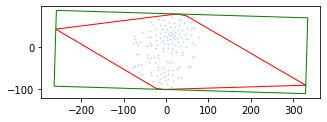

In [12]:
plt.figure(figsize=(5, 5))
it.fit(train_norm, plot=True)

In [13]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan # just for visualization purpose

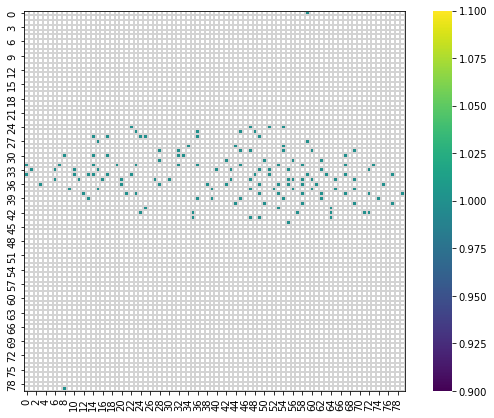

In [14]:
plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

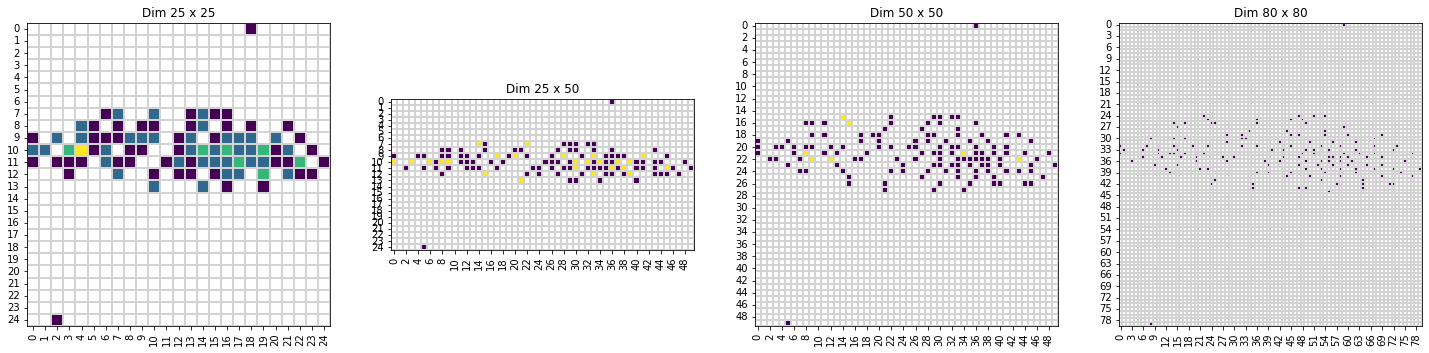

In [15]:
px_sizes = [25, (25, 50), 50, 80]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)

it.pixels = 50

In [16]:
mat_train = it.transform(train_norm)

In [17]:
mat_train.shape, type(mat_train)

((68602, 50, 50, 3), numpy.ndarray)

In [18]:
np.save('np_files/train_image_matrix_50_50.npy', mat_train)

In [13]:
# test loading
mat_train = np.load('np_files/train_image_matrix_50_50.npy')

In [19]:
mat_train.shape

(68602, 50, 50, 3)

## Train/val split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(mat_train, target, 
                                                  test_size= 0.2, 
                                                  random_state=42,
                                                  stratify=is_good)

In [21]:
X_train.shape, y_train.shape

((54881, 50, 50, 3), (54881, 1))

In [22]:
X_val.shape, y_val.shape

((13721, 50, 50, 3), (13721, 1))

### Tensorflow NN

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv1D, Conv2D, AveragePooling1D, AveragePooling2D, LeakyReLU
from tensorflow.keras.layers import Input, Flatten, Reshape, Lambda, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.models import load_model
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
def r2_metric(y_true, y_pred):
    numerator = K.sum((y_true - y_pred) ** 2, axis=0)
    denominator = K.sum((y_true - K.mean(y_pred, axis=0)) ** 2, axis=0)
    return 1-(numerator/denominator)

In [4]:
def LMAE(y_actual, y_pred): 
    lmae=tf.experimental.numpy.log10(K.mean(K.abs(y_actual - y_pred), axis=0))
    return lmae

In [27]:
tf.keras.backend.clear_session()

In [28]:
BATCH_SIZE = 256
EPOCHS = 200
INIT_LR = 0.001

In [29]:
# sklearn use GlorotUniform (from source code)
xavier = tf.keras.initializers.GlorotUniform(seed=42)

In [30]:
optimizer = Adam(learning_rate=INIT_LR, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

In [321]:
# , kernel_regularizer=L2(0.01)

In [322]:
# # 1st architect with 256 batch size
# model = Sequential([
#     InputLayer(input_shape=(80,80,3), dtype='float32'),
#     Conv2D(32, 3, activation='relu', padding='same'),
#     Conv2D(64, 3, activation='relu', padding='same'),
#     Conv2D(64, 3, activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),
#     Dropout(0.25),
#     Conv2D(128, 3, activation='relu', padding='same'),
#     Conv2D(128, 3, activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),
#     Dropout(0.25),
#     Conv2D(256, 3, activation='relu', padding='same'),
#     Conv2D(256, 3, activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),
#     Dropout(0.25),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.4),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dense(16, activation='relu'),
#     Dense(1, activation='linear', kernel_initializer=xavier),
# ])

In [36]:
# 2nd architect
model = Sequential([
    InputLayer(input_shape=(50,50,3), dtype='float32'),
    Conv2D(32, 3, activation='relu', padding='same'),
    Conv2D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(128, 3, activation='relu', padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(256, 3, activation='relu', padding='same'),
    Conv2D(256, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 50, 50, 64)       

In [38]:
# callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss', mode='min')

In [39]:
model.compile(optimizer=optimizer, loss=LMAE, metrics=[])

In [40]:
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          callbacks=[early_stopping]
         )

Epoch 1/200
215/215 [==============================] - 72s 325ms/step - loss: 1.8891 - val_loss: 2.5073
Epoch 2/200
215/215 [==============================] - 86s 399ms/step - loss: 1.5038 - val_loss: 1.8548
Epoch 3/200
215/215 [==============================] - 99s 463ms/step - loss: 1.4496 - val_loss: 1.9176
Epoch 4/200
215/215 [==============================] - 118s 552ms/step - loss: 1.4209 - val_loss: 1.8079
Epoch 5/200
215/215 [==============================] - 128s 597ms/step - loss: 1.4063 - val_loss: 1.6469
Epoch 6/200
215/215 [==============================] - 134s 623ms/step - loss: 1.3937 - val_loss: 1.8381
Epoch 7/200
215/215 [==============================] - 144s 670ms/step - loss: 1.3871 - val_loss: 1.8556
Epoch 8/200
215/215 [==============================] - 146s 682ms/step - loss: 1.3804 - val_loss: 2.1213
Epoch 9/200
215/215 [==============================] - 151s 704ms/step - loss: 1.3749 - val_loss: 1.5904
Epoch 10/200
215/215 [==============================] - 15

In [41]:
y_hat = model.predict(mat_train).flatten()
print('MAE (more accurate): ',mean_absolute_error(target, y_hat))
## look at MAE is more accurate
print('r2 square:', r2_score(target, y_hat))

MAE (more accurate):  22.213853073506375
r2 square: 0.8792058807593872


In [331]:
model.save('models/2nd_deepinsight_cnn_80_80.h5', save_format='h5')

In [ ]:
# TF model with KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True)
cv_loss_per_fold = []
train_loss_per_fold = []
fold_no = 1
inputs = np.array(clean_X)
targets = np.array(y)
for train, test in kfold.split(inputs, targets):
    model = Sequential([
    InputLayer(input_shape=(clean_X.shape[1],), dtype='float32'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
    ])
    
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=[])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    H = model.fit(inputs[train], targets[train],
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
#           validation_split=0.2,
#           callbacks=[early_stopping]
          )
    
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Training loss for fold {fold_no}: {H.history["loss"][-1]}')
    print(f'CV Score for fold {fold_no}: {model.metrics_names[0]} of {scores}')
    cv_loss_per_fold.append(scores)
    train_loss_per_fold.append(H.history["loss"][-1])
    fold_no += 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('CV Score per fold')
for i in range(0, len(cv_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {cv_loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Train Average Loss: {np.mean(train_loss_per_fold)}')
print(f'> CV Average Loss: {np.mean(cv_loss_per_fold)}')
print('------------------------------------------------------------------------')

## Test and Submission

In [16]:
test = pd.read_csv('test_extra_2_no_scaling.csv')
test

,volume,volume/g,density,weight,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption,n_atoms,...,topology_1,topology_2,topology_3,topology_4,topology_5,topology_6,topology_7,topology_8,topology_9,topology_10
0,1208.301332,0.912181,1.096273,797.70936,586.54,0.11392,0.1039,36.639791,7.005640,84,...,0,0,0,0,1,0,0,0,0,0
1,4126.414623,0.665563,1.502488,3733.65779,852.49,0.21367,0.1422,18.390691,5.119399,158,...,0,0,0,0,0,0,0,0,0,0
2,1602.148373,1.291250,0.774443,747.21048,3155.73,0.33883,0.4375,13.062850,5.045400,60,...,0,0,0,0,1,0,0,0,0,0
3,2436.629312,1.473557,0.678630,995.80232,3521.09,0.40464,0.5963,9.601198,5.106238,94,...,0,0,0,0,1,0,0,0,0,0
4,3123.418006,1.406289,0.711091,1337.53800,2678.46,0.38959,0.5479,12.974954,5.287639,118,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,32660.944605,4.163884,0.240160,4723.68288,5720.14,0.77614,3.2318,4.536626,3.146698,416,...,0,0,0,1,0,0,0,0,0,0
16996,5070.998617,2.037061,0.490903,1499.13262,4017.28,0.59192,1.2058,6.745508,3.658871,124,...,0,0,0,1,0,0,0,0,0,0
16997,4669.804446,2.127168,0.470109,1322.04892,4288.76,0.54950,1.1689,4.666206,3.593052,112,...,0,0,0,0,1,0,0,0,0,0
16998,4682.120862,2.323536,0.430379,1213.51148,4331.86,0.60643,1.4091,4.823305,3.454497,104,...,0,0,0,0,1,0,0,0,0,0


In [17]:
test_norm = ln.transform(test)

In [18]:
mat_test = it.transform(test_norm)

In [19]:
np.save('np_files/test_image_matrix_50_50.npy', mat_test)

In [176]:
predict = model.predict(mat_test).flatten()

predicted_df = pd.DataFrame({"id":range(68614,68614+len(test)), "CO2_working_capacity [mL/g]":predict})
predicted_df

,id,CO2_working_capacity [mL/g]
0,68614,177.120590
1,68615,60.852951
2,68616,62.032269
3,68617,59.481808
4,68618,61.565498
...,...,...
16995,85609,-7.604535
16996,85610,0.004563
16997,85611,0.004563
16998,85612,-1.422112


In [177]:
predicted_df.to_csv("output/phase2/submission.csv",index=False)

In [206]:
best = pd.read_csv('output/phase2/best.csv')

In [207]:
fun_ensemble = best[['id']]

In [208]:
fun_ensemble['CO2_working_capacity [mL/g]'] = (0.8*best['CO2_working_capacity [mL/g]']) + (0.2 * predicted_df['CO2_working_capacity [mL/g]'])

In [209]:
fun_ensemble.to_csv('output/phase2/submission.csv', index=False)

## Turn model to feature extractor

In [180]:
loaded_model = load_model('models/deepinsight_cnn_80_80.h5', custom_objects={'LMAE':LMAE})

In [181]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 80, 80, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 80, 80, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 80, 80, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 40, 40, 128)      

In [196]:
feats_ext = tf.keras.Model(inputs = loaded_model.input, outputs = loaded_model.layers[-2].output)

In [198]:
feats_ext.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 80, 80, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 80, 80, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 80, 80, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 40, 64)        0     

In [210]:
feats_ext.save('models/di_cnn_feats_ext.h5', save_format='h5')

## Train new feats

In [5]:
feats_ext = load_model('models/di_cnn_feats_ext.h5', custom_objects={'LMAE':LMAE})

In [10]:
!pip install pydot graphviz

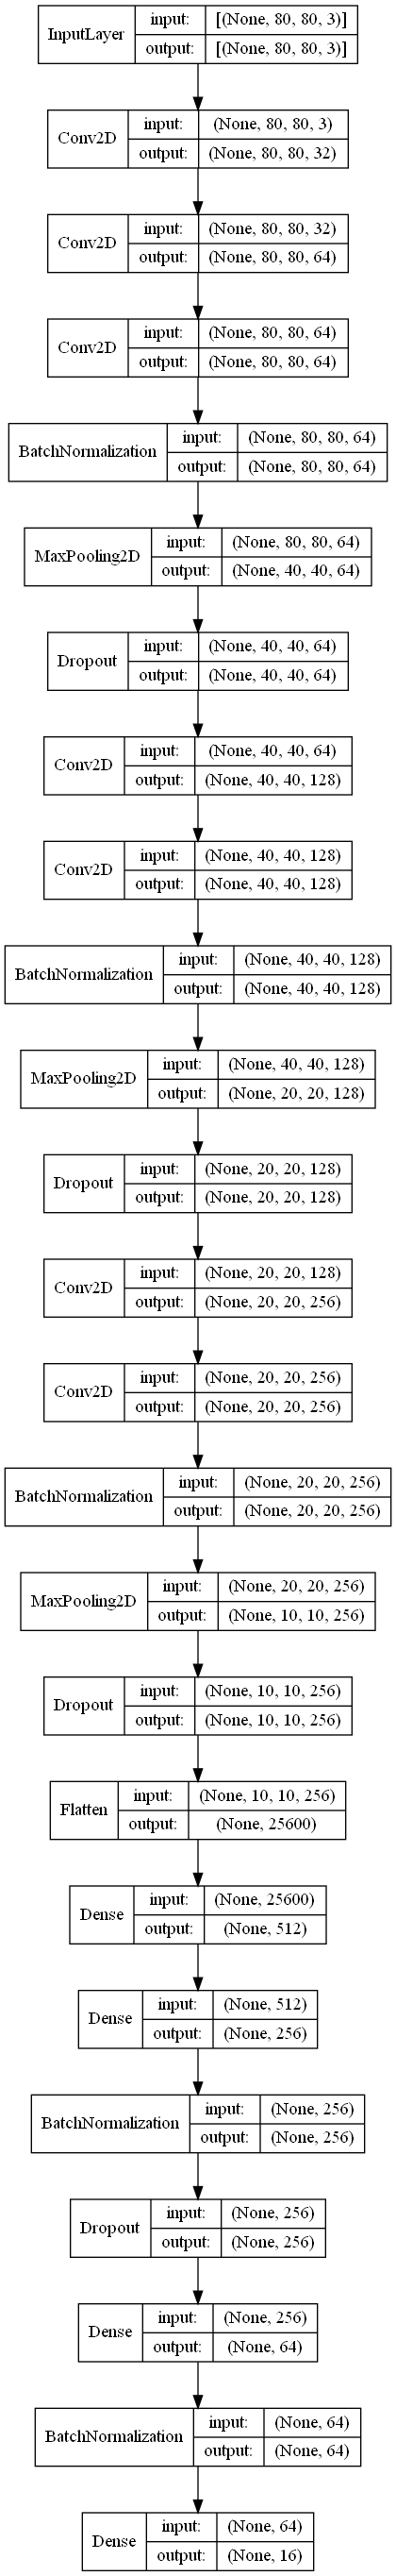

In [7]:
tf.keras.utils.plot_model(feats_ext, to_file="my_model.png", show_shapes=True, show_layer_names=False)

In [199]:
new_feats = feats_ext.predict(mat_train)
new_feats.shape

(68602, 16)

In [228]:
new_feats_cols = [f'di_cnn_{i}' for i in range(new_feats.shape[1])]
new_feats_df = pd.DataFrame(new_feats, columns=new_feats_cols)
new_feats_df

,di_cnn_0,di_cnn_1,di_cnn_2,di_cnn_3,di_cnn_4,di_cnn_5,di_cnn_6,di_cnn_7,di_cnn_8,di_cnn_9,di_cnn_10,di_cnn_11,di_cnn_12,di_cnn_13,di_cnn_14,di_cnn_15
0,0.0,21.167830,30.934912,0.0,0.0,21.876890,30.938911,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,24.025457,0.0
1,0.0,23.965372,35.462387,0.0,0.0,25.400829,35.742039,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,26.279602,0.0
2,0.0,25.874134,39.247131,0.0,0.0,27.537067,39.353321,0.0,0.000000,0.0,5.338663,0.0,0.0,0.0,26.913395,0.0
3,0.0,28.681208,44.552822,0.0,0.0,31.782713,44.529415,0.0,0.000000,0.0,20.764702,0.0,0.0,0.0,29.767157,0.0
4,0.0,21.825914,31.975189,0.0,0.0,22.386007,31.988407,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,24.455626,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68597,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.536157,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
68598,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
68599,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
68600,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [229]:
new_feats_df.describe()

,di_cnn_0,di_cnn_1,di_cnn_2,di_cnn_3,di_cnn_4,di_cnn_5,di_cnn_6,di_cnn_7,di_cnn_8,di_cnn_9,di_cnn_10,di_cnn_11,di_cnn_12,di_cnn_13,di_cnn_14,di_cnn_15
count,68602.0,68602.000000,68602.000000,68602.0,68602.000000,68602.000000,68602.000000,68602.0,68602.000000,68602.0,68602.000000,68602.0,68602.000000,68602.000000,68602.000000,68602.000000
mean,0.0,20.601782,32.062370,0.0,0.574373,23.895941,31.967796,0.0,0.746188,0.0,16.154501,0.0,2.756109,0.003251,23.036751,0.900197
std,0.0,9.974702,16.408279,0.0,1.164420,12.789223,16.666117,0.0,4.101822,0.0,27.574968,0.0,10.320706,0.061450,11.238010,2.457077
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,14.836861,21.866644,0.0,0.000000,17.017932,21.248284,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,16.419960,0.000000
50%,0.0,23.272974,34.557562,0.0,0.000000,24.386808,34.433174,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,24.338228,0.000000
75%,0.0,29.121634,45.967256,0.0,0.252267,32.766131,46.018899,0.0,0.000000,0.0,22.609877,0.0,0.000000,0.000000,31.317194,0.000000
max,0.0,43.842312,57.914997,0.0,10.258031,88.345787,64.400414,0.0,43.081436,0.0,182.934509,0.0,119.085663,2.493887,61.993038,15.900460


In [230]:
# drop those feats containing only 0 values (maybe the effect from dropout)
new_feats_df = new_feats_df.drop(['di_cnn_0', 'di_cnn_3', 'di_cnn_7', 'di_cnn_9', 'di_cnn_11'], axis=1)
new_feats_df

,di_cnn_1,di_cnn_2,di_cnn_4,di_cnn_5,di_cnn_6,di_cnn_8,di_cnn_10,di_cnn_12,di_cnn_13,di_cnn_14,di_cnn_15
0,21.167830,30.934912,0.0,21.876890,30.938911,0.000000,0.000000,0.0,0.0,24.025457,0.0
1,23.965372,35.462387,0.0,25.400829,35.742039,0.000000,0.000000,0.0,0.0,26.279602,0.0
2,25.874134,39.247131,0.0,27.537067,39.353321,0.000000,5.338663,0.0,0.0,26.913395,0.0
3,28.681208,44.552822,0.0,31.782713,44.529415,0.000000,20.764702,0.0,0.0,29.767157,0.0
4,21.825914,31.975189,0.0,22.386007,31.988407,0.000000,0.000000,0.0,0.0,24.455626,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68597,0.000000,0.000000,0.0,0.000000,0.000000,2.536157,0.000000,0.0,0.0,0.000000,0.0
68598,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
68599,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
68600,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [231]:
new_feats_df.to_csv('train_feats_from_di_cnn.csv', index=False)

## Test new feats

In [232]:
test_new_feats = feats_ext.predict(mat_test)
test_new_feats.shape

(17000, 16)

In [233]:
test_new_feats_df = pd.DataFrame(test_new_feats, columns=new_feats_cols)
test_new_feats_df

,di_cnn_0,di_cnn_1,di_cnn_2,di_cnn_3,di_cnn_4,di_cnn_5,di_cnn_6,di_cnn_7,di_cnn_8,di_cnn_9,di_cnn_10,di_cnn_11,di_cnn_12,di_cnn_13,di_cnn_14,di_cnn_15
0,0.0,30.440174,48.356892,0.0,0.000000,34.556770,48.609718,0.0,0.000000,0.0,28.531464,0.0,0.0,0.0,33.908691,0.000000
1,0.0,9.247261,14.186121,0.0,0.000000,11.476697,13.499871,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.669582,10.738886
2,0.0,14.510868,21.447094,0.0,4.171774,16.769449,20.630054,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,14.299532,0.456302
3,0.0,13.006152,19.137091,0.0,3.882986,15.593858,18.270979,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,13.343773,3.108078
4,0.0,11.602341,16.963276,0.0,1.470842,14.365107,16.177500,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,14.241302,8.076712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0.0,0.000000,0.000000,0.0,1.084170,0.000000,0.000000,0.0,26.112291,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
16996,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
16997,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
16998,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,4.955123,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [234]:
test_new_feats_df.describe()

,di_cnn_0,di_cnn_1,di_cnn_2,di_cnn_3,di_cnn_4,di_cnn_5,di_cnn_6,di_cnn_7,di_cnn_8,di_cnn_9,di_cnn_10,di_cnn_11,di_cnn_12,di_cnn_13,di_cnn_14,di_cnn_15
count,17000.0,17000.000000,17000.000000,17000.0,17000.000000,17000.000000,17000.000000,17000.0,17000.000000,17000.0,17000.000000,17000.0,17000.000000,17000.000000,17000.000000,17000.000000
mean,0.0,19.246334,29.680969,0.0,0.704428,22.128553,29.515322,0.0,1.029979,0.0,12.721861,0.0,2.026930,0.000407,21.350115,1.106024
std,0.0,9.865600,16.034487,0.0,1.255562,12.330595,16.267271,0.0,4.702759,0.0,24.747637,0.0,8.989811,0.018484,10.709275,2.687207
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,13.518953,19.884085,0.0,0.000000,15.989784,19.227555,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,15.226677,0.000000
50%,0.0,20.854296,30.630587,0.0,0.000000,21.998467,30.351612,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,21.668471,0.000000
75%,0.0,27.885930,42.871400,0.0,1.031594,30.410144,42.926318,0.0,0.000000,0.0,13.867979,0.0,0.000000,0.000000,29.007347,0.000000
max,0.0,43.491451,57.931873,0.0,9.288282,87.367409,64.169914,0.0,42.195904,0.0,180.508804,0.0,116.977852,1.817728,61.627983,14.934413


In [235]:
# drop those feats containing only 0 values (maybe the effect from dropout)
test_new_feats_df = test_new_feats_df.drop(['di_cnn_0', 'di_cnn_3', 'di_cnn_7', 'di_cnn_9', 'di_cnn_11'], axis=1)
test_new_feats_df

,di_cnn_1,di_cnn_2,di_cnn_4,di_cnn_5,di_cnn_6,di_cnn_8,di_cnn_10,di_cnn_12,di_cnn_13,di_cnn_14,di_cnn_15
0,30.440174,48.356892,0.000000,34.556770,48.609718,0.000000,28.531464,0.0,0.0,33.908691,0.000000
1,9.247261,14.186121,0.000000,11.476697,13.499871,0.000000,0.000000,0.0,0.0,19.669582,10.738886
2,14.510868,21.447094,4.171774,16.769449,20.630054,0.000000,0.000000,0.0,0.0,14.299532,0.456302
3,13.006152,19.137091,3.882986,15.593858,18.270979,0.000000,0.000000,0.0,0.0,13.343773,3.108078
4,11.602341,16.963276,1.470842,14.365107,16.177500,0.000000,0.000000,0.0,0.0,14.241302,8.076712
...,...,...,...,...,...,...,...,...,...,...,...
16995,0.000000,0.000000,1.084170,0.000000,0.000000,26.112291,0.000000,0.0,0.0,0.000000,0.000000
16996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
16997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
16998,0.000000,0.000000,0.000000,0.000000,0.000000,4.955123,0.000000,0.0,0.0,0.000000,0.000000


In [236]:
test_new_feats_df.to_csv('test_feats_from_di_cnn.csv', index=False)